In [3]:
!pip install gym_super_mario_bros==7.3.0 nes_py

In [2]:
import gym_super_mario_bros

from nes_py.wrappers import JoypadSpace

from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
env = gym_super_mario_bros.make("SuperMarioBros-v0")
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [ ]:
done = True
for step in range(100000):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()
env.close()

In [1]:
!pip install stable-baselines3[extra]

ImportError: cannot import name 'VeFrameStack' from 'stable_baselines3.common.vec_env' (C:\Users\artem\anaconda3\lib\site-packages\stable_baselines3\common\vec_env\__init__.py)

In [4]:
from gym.wrappers import GrayScaleObservation 

from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

from matplotlib import pyplot as plt

In [5]:
env = gym_super_mario_bros.make("SuperMarioBros-v0")
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env, keep_dim = True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order = "last")

In [6]:
state = env.reset()
state, reward, done, info = env.step([env.action_space.sample()])
state.shape

(1, 240, 256, 4)

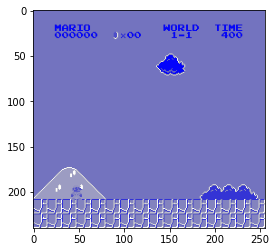

In [9]:
plt.imshow(state[0])

In [7]:
import os 

from stable_baselines3 import PPO

from stable_baselines3.common.callbacks import BaseCallback

In [8]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [9]:
CHECKPOINT_DIR = "./train/"
LOG_DIR="./logs/"
callback = TrainAndLoggingCallback(check_freq = 1000, save_path = CHECKPOINT_DIR)

In [11]:
model = PPO("CnnPolicy",env,verbose = 1, tensorboard_log=LOG_DIR, learning_rate = 0.000001, n_steps = 512)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [17]:
model.learn(total_timesteps = 100000, callback = callback)

Logging to ./logs/PPO_3
----------------------------
| time/              |     |
|    fps             | 68  |
|    iterations      | 1   |
|    time_elapsed    | 7   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 2             |
|    time_elapsed         | 89            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 5.5334647e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.0118        |
|    learning_rate        | 1e-06         |
|    loss                 | 225           |
|    n_updates            | 80            |
|    policy_gradient_loss | -4.02e-05     |
|    value_loss           | 580           |
-------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 5            |
|    iterations           | 13           |
|    time_elapsed         | 1132         |
|    total_timesteps      | 6656         |
| train/                  |              |
|    approx_kl            | 3.453379e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | 0.000316     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.15         |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.000552    |
|    value_loss           | 0.321        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 14            |
|    time_elapsed         | 1244          |
|    t

In [21]:
!pip install tensorflow-tensorboard

ERROR: Could not find a version that satisfies the requirement cudart64_110.dll
ERROR: No matching distribution found for cudart64_110.dll


In [10]:
model=PPO.load("./train/best_model_14000")

In [20]:
state = env.reset()

while True:
    action, _state = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 